
# 1º Entrega TP Final Data Science II - Coder
> ### Alumno: Juan Pablo Ludueña

## Abstract:
Éste trabajo se centra en el análisis de un dataset de reservas de hoteles con el objetivo de desarrollar un modelo predictivo que permita inferir la probabilidad de cancelación de una reserva. 
El dataset incluye variables clave como las fechas de reserva, la cantidad de adultos, menores y bebés por reserva, la nacionalidad de los huéspedes, y el tipo de habitación seleccionada, y otra información que puede ser relevante a la hora de determinar nuestra hipotesis. 
A través de técnicas de análisis exploratorio de datos (EDA) y visualización de datos, se identificarán patrones y correlaciones que puedan indicar factores determinantes en la decisión de cancelación.

## Primeros pasos

Para poder analizar los datos que tenemos utilizaremos herramientas tecnológicas que nos facilitarán el trabajo.
Necesitaremos tener instalado Python en su última versión, además las siguientes librerias que nos seran de mucha ayuda:

### imports

In [1]:
import numpy as np
import pandas as pd

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# algoritmos
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBRegressor

pd.options.mode.copy_on_write = True
pd.options.display.max_columns = None


### Cargo dataset

In [2]:
# Cargar el archivo CSV
df_hotel_original = pd.read_csv('../hotel_bookings.csv', delimiter=',')
df_hotel_original.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/07/15
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/07/15
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/05/15
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/15


## EDA

In [3]:
print("cantidad de registros y columnas originales -->", df_hotel_original.shape)
print(df_hotel_original['days_in_waiting_list'].unique())

cantidad de registros y columnas originales --> (119390, 31)
[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


In [4]:
# análisis de columnas
print("")
print("head")
print("-----------------------")
print(df_hotel_original.head())
print("")
print("info")
print("-----------------------")
print(df_hotel_original.info())
print("")
print("describe")
print("-----------------------")
print(df_hotel_original.describe())
print("-----------------------")



head
-----------------------
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2

### Columnas del dataset

| Atributo                        | Descripción                                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| `hotel`                          | Nombre del hotel en el que se realizó la reserva.             |
| `is_canceled`                    | Indica si la reserva fue cancelada (1) o no (0).                                               |
| `lead_time`                      | Número de días entre la fecha de reserva y la fecha de llegada.                                |
| `arrival_date_year`              | Año de la fecha de llegada.                                                                    |
| `arrival_date_month`             | Mes de la fecha de llegada.                                                                    |
| `arrival_date_week_number`       | Número de la semana del año en la que ocurre la llegada.                                       |
| `arrival_date_day_of_month`      | Día del mes en el que ocurre la llegada.                                                       |
| `stays_in_weekend_nights`        | Número de noches de fin de semana (sábado o domingo) incluidas en la estancia.                 |
| `stays_in_week_nights`           | Número de noches entre semana (lunes a viernes) incluidas en la estancia.                      |
| `adults`                         | Número de adultos en la reserva.                                                               |
| `children`                       | Número de niños en la reserva.                                                                |
| `babies`                         | Número de bebés en la reserva.                                                                 |
| `meal`                           | Tipo de comida reservado (e.g., desayuno incluido).                                            |
| `country`                        | País de origen del cliente.                                                                    |
| `market_segment`                 | Segmento de mercado al que pertenece el cliente.                  |
| `distribution_channel`           | Canal de distribución utilizado para realizar la reserva .            |
| `is_repeated_guest`              | Indica si el cliente es un huésped recurrente (1) o no (0).                                    |
| `previous_cancellations`         | Número de reservas previas que el cliente ha cancelado.                                        |
| `previous_bookings_not_canceled` | Número de reservas previas que no han sido canceladas por el cliente.                          |
| `reserved_room_type`             | Tipo de habitación originalmente reservada.                                                    |
| `assigned_room_type`             | Tipo de habitación asignada al cliente (puede ser diferente de la reservada).                  |
| `booking_changes`                | Número de cambios en la reserva realizados por el cliente.                                     |
| `agent`                          | ID del agente que realizó la reserva (si aplica).                                              |
| `company`                        | ID de la empresa que realizó la reserva (si aplica).                                           |
| `days_in_waiting_list`           | Número de días que la reserva estuvo en lista de espera antes de ser confirmada.               |
| `customer_type`                  | Tipo de cliente.                                            |
| `adr`                            | Tarifa diaria promedio de la reserva (Average Daily Rate).                                     |
| `required_car_parking_spaces`    | Número de espacios de estacionamiento solicitados (1)si - (0)no.   |
| `total_of_special_requests`      | Número total de solicitudes especiales realizadas por el cliente.                              |
| `reservation_status`             | Estado actual de la reserva (e.g., Check-Out, Canceled).                                       |
| `reservation_status_date`        | Fecha en la que se actualizó por última vez el estado de la reserva.                           |


In [5]:
# copio el dataset en otra variable que usaré para realizar el EDA
df_hotel = df_hotel_original

# elimino la columna "reservation_status" ya que contiene info redundante con la columna "is_canceled"
df_hotel.drop('reservation_status', axis=1, inplace=True)


In [6]:

# Ver si hay alguna fila vacías
filas_totalmente_vacias = df_hotel.isnull().all(axis=1)
print("\nfilas vacías:", filas_totalmente_vacias.sum())

# control duplicados
valores_duplicados = df_hotel.duplicated().sum()
df_hotel = df_hotel.drop_duplicates()
print("\nvalores duplicados eliminados:", valores_duplicados.sum())
# elimino registros duplicados



filas vacías: 0

valores duplicados eliminados: 32001


In [7]:
# identifico valores faltantes
print("\ncolumnas con valores faltantes:")
missing_values = df_hotel.isnull().sum()
print(missing_values[missing_values > 0])



columnas con valores faltantes:
children        4
country       452
agent       12193
company     82130
dtype: int64


Para las variables numéricas completo los datos faltantes con la media de sus datos y a las categóricas con la moda de la columna correspondiente

In [8]:
df_hotel['children'] = df_hotel['children'].fillna(df_hotel['children'].mean())  
df_hotel['country'] = df_hotel['country'].fillna(df_hotel['country'].mode()[0])
df_hotel['agent'] = df_hotel['agent'].fillna(df_hotel['agent'].mode()[0])
df_hotel['company'] = df_hotel['company'].fillna(df_hotel['company'].mode()[0])

### Manejo de outliers

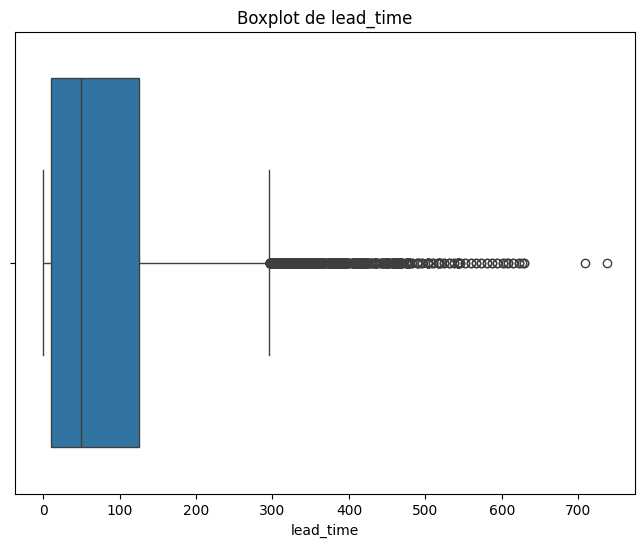

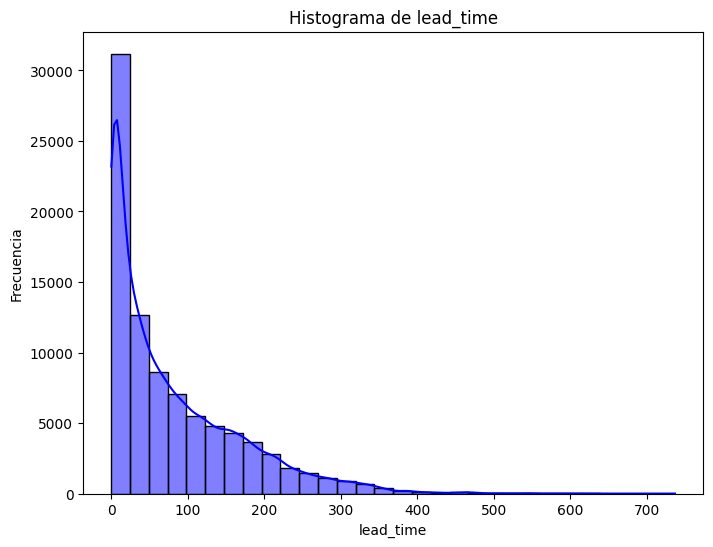

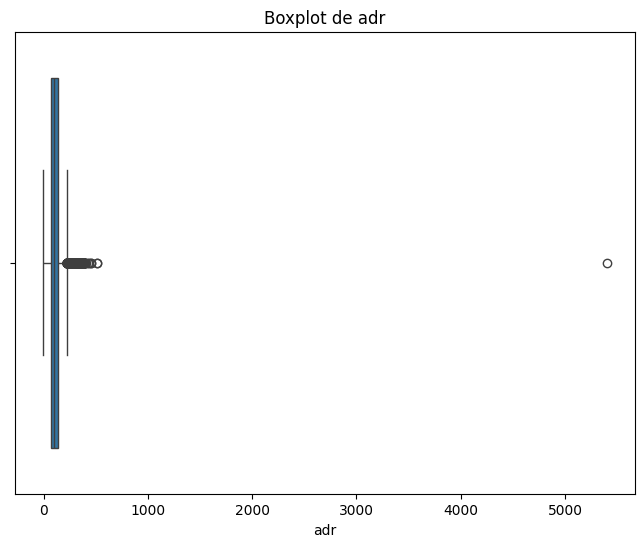

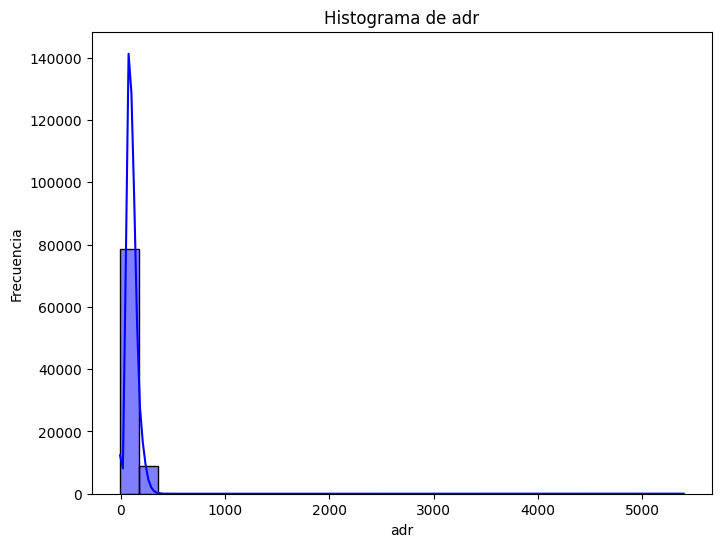

In [9]:
# Seleccionar solo las columnas numéricas del DataFrame
columns_to_review_outliers = ['lead_time', 'adr']
print ()
# Crear un boxplot e histograma para cada columna numérica
for col in columns_to_review_outliers:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    sns.boxplot(x=df_hotel[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    sns.histplot(df_hotel[col], bins=30, kde=True, color='blue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

elimino outliers con el metodo de rango intercuartil

In [10]:
# Aplicar el Método del Rango Intercuartil (IQR) para detectar y eliminar outliers
for col in columns_to_review_outliers:
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = df_hotel[col].quantile(0.25)
    Q3 = df_hotel[col].quantile(0.75)
    
    # Calcular el rango intercuartil (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar el DataFrame eliminando los outliers
    df_hotel = df_hotel[(df_hotel[col] >= lower_bound) & (df_hotel[col] <= upper_bound)]


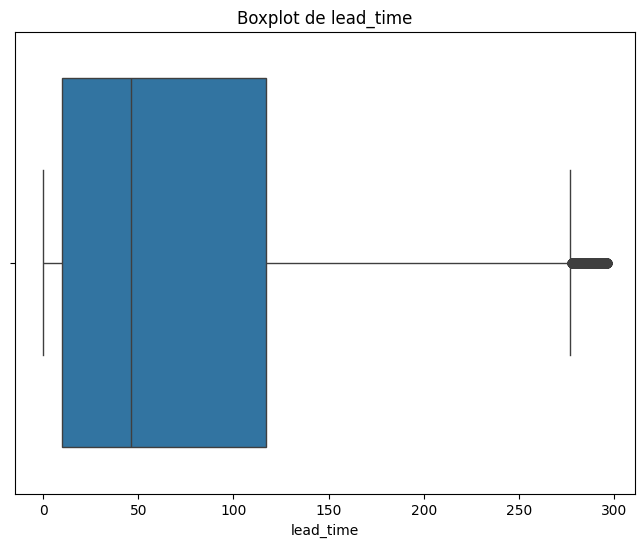

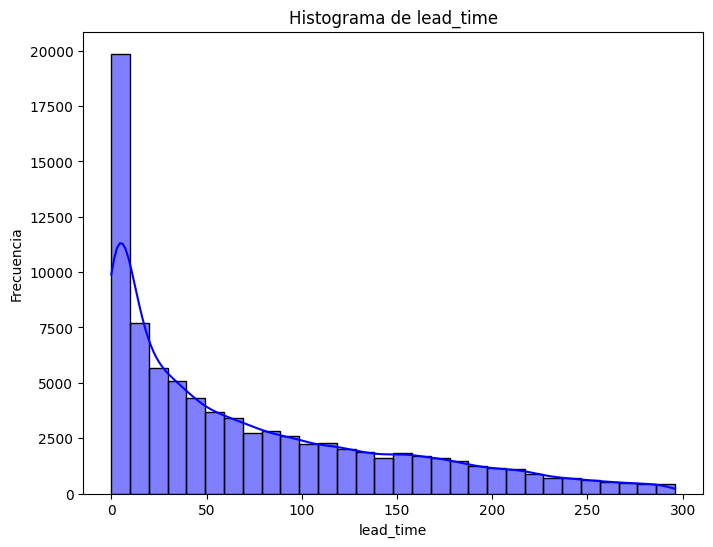

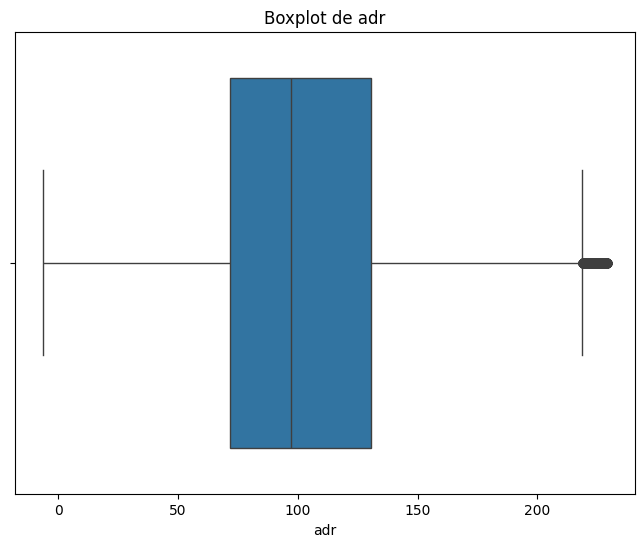

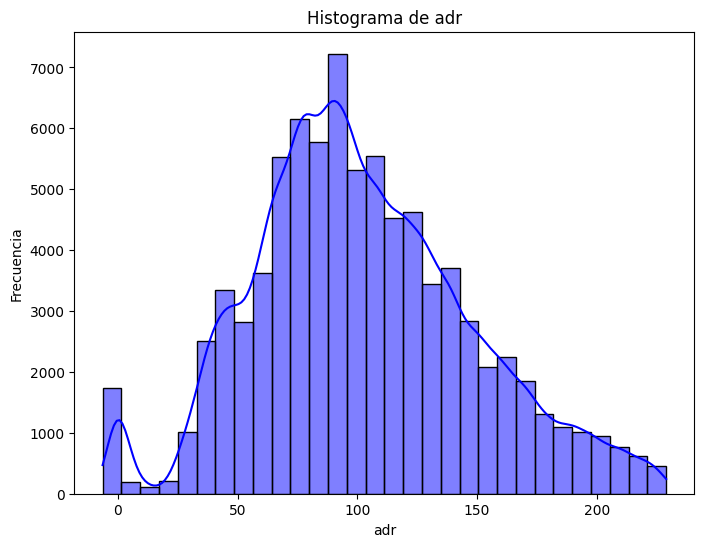

In [11]:
# vuelvo a generar los gráficos para ver el resultado luego de aplicar el metodo de IQR
for col in columns_to_review_outliers:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    sns.boxplot(x=df_hotel[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    sns.histplot(df_hotel[col], bins=30, kde=True, color='blue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### Preprocesamiento de datos categóricos

In [12]:
# Identifico variables categóricas
categorical_cols = df_hotel.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variables categóricas:", categorical_cols)

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_hotel[col] = le.fit_transform(df_hotel[col])
    label_encoders[col] = le


Variables categóricas: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status_date']


In [13]:
# Mostrar el DataFrame transformado
print(df_hotel.head())

   hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   
6      1            0          0               2015                   5   
7      1            0          9               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
2                        27                          1   
3                        27                          1   
4                        27                          1   
6                        27                          1   
7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                  

is_canceled                       1.000000
market_segment                    0.181928
lead_time                         0.179843
distribution_channel              0.145397
adr                               0.137534
adults                            0.088561
country                           0.085698
stays_in_week_nights              0.082264
arrival_date_year                 0.081835
stays_in_weekend_nights           0.059303
children                          0.056873
meal                              0.049533
previous_cancellations            0.048347
reserved_room_type                0.039127
arrival_date_day_of_month         0.005822
days_in_waiting_list              0.003345
arrival_date_week_number         -0.001368
reservation_status_date          -0.002408
agent                            -0.014786
babies                           -0.018408
customer_type                    -0.027900
arrival_date_month               -0.040641
previous_bookings_not_canceled   -0.052401
company    

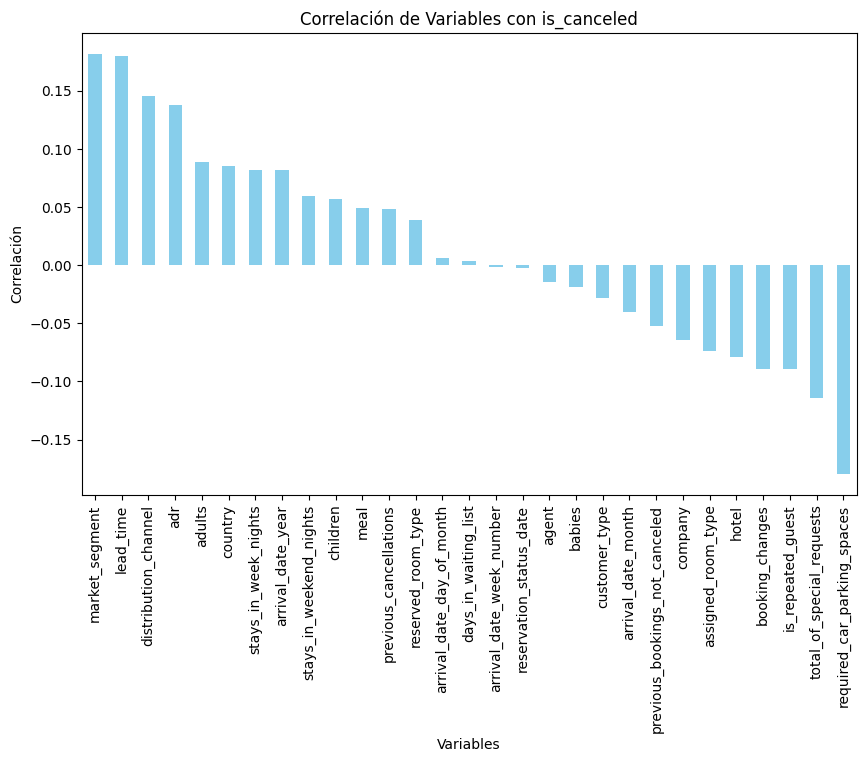

In [14]:
# Calcular la matriz de correlación
correlation_matrix = df_hotel.corr()

# Filtrar las correlaciones de 'is_canceled'
corr_is_canceled = correlation_matrix["is_canceled"].sort_values(ascending=False)

print(corr_is_canceled)
# Graficar la correlación de 'is_canceled' con otras variables
plt.figure(figsize=(10, 6))
corr_is_canceled.drop('is_canceled').plot(kind='bar', color='skyblue')
plt.title('Correlación de Variables con is_canceled')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

Como en la mayoria de las variables, la corelación entre ellas y "is_canceled" es baja, el estudio se hará con la mayoría de ellas.